# Census 2011 in UK

Every ten years, UK conducts a census for developing policies, planning and running public services (schools, libraries, hospitals), allocating fundings and comparing different groups of people across England, Wales, Scotland and Northern Ireland. Investing decisions, generation of new jobs, housing and equal opportunities policies are based on quality data that census provides showing how many people work in every industry, housing information to know how people live - which allows to detect inadequate accomodation situations -, and identify disadvantages into ethnic and minority groups.

This census was the first completed online. The Office for National Statistics (ONS) was responsable to conduct the census in England and Wales, meanwhile the General Register Office for Scotland (GROS) did the same in Scotland, and the Northern Ireland Statistics and Research Agency (NISRA) in Northern Ireland.

The cost of the 2011 Census in England and Wales was around £482 million, more than twice the £210m spent on the 2001 census. If the census has a validity of 10 years, then the cost per person and year was 87 pence, being more expensive thar similar censuses in many other European countries (as indicated the Minister of State, Cabinet Office in 2009, Angela E. Smith in [First Delegated Legislation Committee](https://publications.parliament.uk/pa/cm200910/cmgeneral/deleg1/091130/91130s01.htm)). For that reason, this census is supposed to provide meaningful information about the population and clues related to how the central government can recognize urgent needs of local populations and distributes funding between local authorities to benefit people around the country.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

In [2]:
df = pd.read_csv('../Conundrum7/Conundrum7Data.csv')

In [3]:
df.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569741 entries, 0 to 569740
Data columns (total 18 columns):
Person ID                    569741 non-null int64
Region                       569741 non-null object
Residence Type               569741 non-null object
Family Composition           569741 non-null int64
Population Base              569741 non-null int64
Sex                          569741 non-null int64
Age                          569741 non-null int64
Marital Status               569741 non-null int64
Student                      569741 non-null int64
Country of Birth             569741 non-null int64
Health                       569741 non-null int64
Ethnic Group                 569741 non-null int64
Religion                     569741 non-null int64
Economic Activity            569741 non-null int64
Occupation                   569741 non-null int64
Industry                     569741 non-null int64
Hours worked per week        569741 non-null int64
Approximated Social 

In this case, there is not missing values, but we apply the `dropna()` function as sanity check. Remember that we are able to drop rows or columns without information in the case when all the cells (or any of them) have missing values through the parameters `axis` (0 by default that means 'index' and 1 meaning 'columns') and `how` ('any' as default or 'all').

In [5]:
df.dropna(axis=0, how='any', inplace=True)

Drop possible duplicates rows:

In [6]:
df.drop_duplicates(keep='first', inplace=True)

Check the number of rows and columns after dropping missing values and duplicates inputs:

In [7]:
df.shape

(569741, 18)

It seems like there is not missing values and every inputs belongs to an unique ID person. Let's group the people polled by `Region`, `residence Type`, `Sex`, `Age` and `Marital Status`:

### Population by region

In [8]:
df_region = pd.DataFrame({'region_name':['North East','North West','Yorkshire and the Humber',
                                        'East Midlands','West Midlands','East of England',
                                        'London','South East','South West','Wales']},
                         index=['E12000001', 'E12000002', 
                                 'E12000003', 'E12000004', 
                                 'E12000005', 'E12000006', 
                                 'E12000007', 'E12000008',
                                 'E12000009', 'W92000004'])

In [9]:
df_group = df.copy()
df_group['counter'] = 1

In [10]:
df_groupRegion = df_group.groupby('Region').count().sort_values(by='Person ID', ascending=False).counter

In [11]:
df1 = pd.concat([df_groupRegion, df_region], axis=1, sort=False)

In [12]:
df1['%'] = (df1.counter/df1.counter.sum())*100
df1

,counter,region_name,%
E12000008,88084,South East,15.460358
E12000007,83582,London,14.670175
E12000002,71436,North West,12.538329
E12000006,59411,East of England,10.427721
E12000005,56875,West Midlands,9.982606
E12000009,53774,South West,9.438324
E12000003,53471,Yorkshire and the Humber,9.385142
E12000004,45782,East Midlands,8.035581
W92000004,30977,Wales,5.437032
E12000001,26349,North East,4.624733


In [13]:
df1.iloc[0:4, 2].sum()

53.09658248221561

<img src="uk-regions.png" alt="Drawing" style="width: 400px;"/>

South East, London, North West and East of England concentrate more than 53% of the population across England and Wales. 

London, although the smallest area with a surface of 1.572 $km^2$ in relation with his neighbors East and South East, is the second region more populated and it has the highest population density in the UK. The main economic clusters are the financial sector, technology, digital and creative startups. 

On the other hand, South East, the second more dense area (around 9 million of population), with a surface of 19.095 $km^2$, is the region with more varied economy of all UK, from engineering, IT, technology, defence, aero and space industries, to pharmaceutical, biotech, agriculture and creative sectors. 

University of Cambridge, in the heart of East of England, attrack technical and multinationals companies and provides to the region the highest concentration of research and development industries as pharmaceutical, automotive, life science and health, agritech and high-tech systems and materials. East of England has a surface area of 19.120 $km^2$.

North West (14.165 $km^2$) is second-largest regional economy, after London. Manchester and Liverpool are the economic hearts of the area.

### Population by sex

In [14]:
df_groupRegionSex = df_group.groupby(['Region', 'Sex']).count().sort_values(by='Person ID', ascending=False).counter

In [15]:
sex = pd.DataFrame({'Sex':[1,2], 'Initials':['M', 'F']})

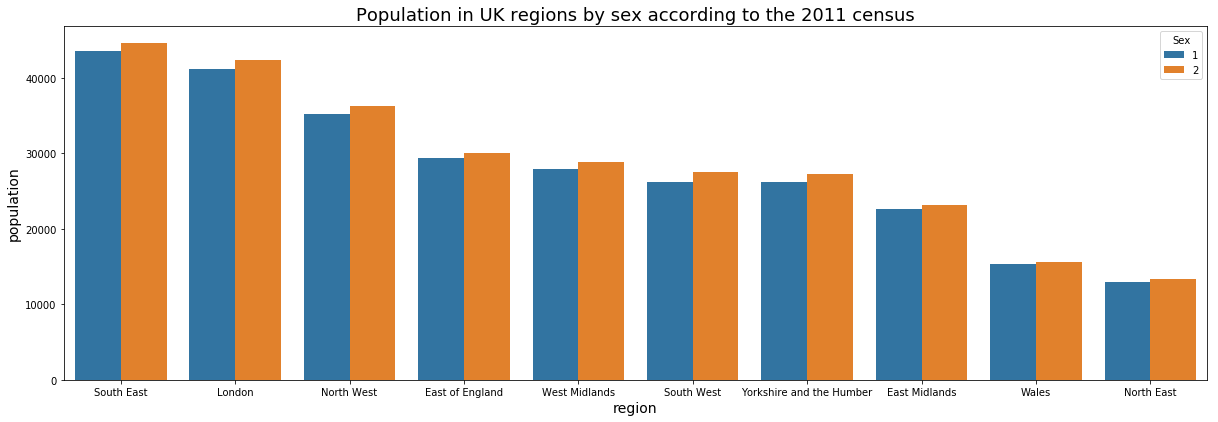

In [16]:
_ = plt.figure(figsize=(20.5, 6.5))
_ = sns.barplot(x='Region', y='counter', hue="Sex", data=df_groupRegionSex.reset_index())
_ = plt.xticks(np.arange(df1.shape[0]), df1.region_name)
_ = plt.title('Population in UK regions by sex according to the 2011 census', size=18)
_ = plt.ylabel('population', size=14)
_ = plt.xlabel('region', size=14)

### Population by residence type

Census establishes 2 types of residences: 
- Resident in a communal establishment
- Not resident in a communal establishment

In [17]:
df_groupResidence = df_group.groupby('Residence Type').count()
df_groupResidence['%'] = 100*(df_groupResidence.counter/df_groupResidence.counter.sum())

In [18]:
df_groupResidence.loc[:, ['counter', '%']]

,counter,%
Residence Type,,
C,10654,1.869972
H,559087,98.130028


### Composition family and age distributions

In [19]:
df_family = pd.DataFrame({'code':[1, 2, 3, 4, 5, 6, -9], 
                          'type_family':['Not in a family', 
                                         'Married/same-sex civil partnership couple family',
                                         'Cohabiting couple family',
                                         'Lone parent family (male head)', 
                                         'Lone parent family (female head)',
                                         'Other related family', 
                                         'No code required']})

-9 code: No code required. Resident of a communal establishment, students or schoolchildren living away during term-time, or a short-term resident.

In [20]:
df_group.groupby(['Family Composition', 'Residence Type']).count().counter

Family Composition  Residence Type
-9                  C                  10654
                    H                   8197
 1                  H                  96690
 2                  H                 300962
 3                  H                  72641
 4                  H                   9848
 5                  H                  64519
 6                  H                   6230
Name: counter, dtype: int64

### Occupation, Industry and Social Grade

Social grades are grouping as AB, C1, C2, DE and -9 as no code required (People aged under 16, people resident in communal establishments, and students or schoolchildren living away during term-time).

In [21]:
df_occupationSocial = df_group.groupby(['Occupation', 'Approximated Social Grade']).count().counter.reset_index()

In [22]:
df3 = df_occupationSocial[(df_occupationSocial.Occupation != -9) & (df_occupationSocial['Approximated Social Grade'] != -9)]

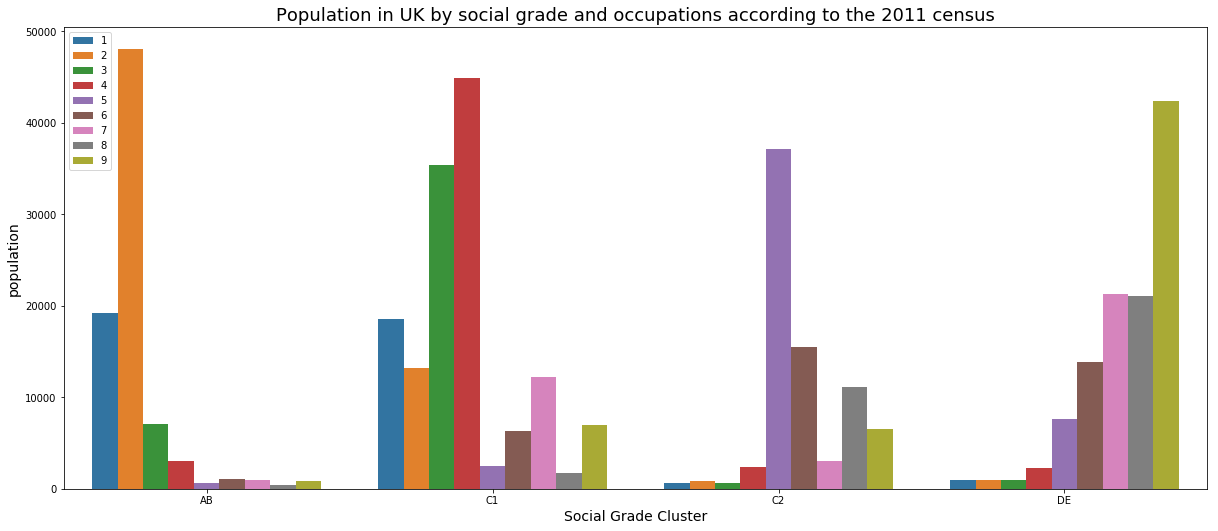

In [23]:
_ = plt.figure(figsize=(20.5, 8.5))
_ = sns.barplot(x='Approximated Social Grade', y='counter', hue='Occupation', data=df3)
_ = plt.title('Population in UK by social grade and occupations according to the 2011 census', size=18)
_ = plt.xticks(np.arange(4), ('AB','C1','C2', 'DE'))
_ = plt.ylabel('population', size=14)
_ = plt.xlabel('Social Grade Cluster', size=14)
_ = plt.legend(loc='upper left')

1. Managers, Directors and Senior Officials 
2. Professional Occupations 
3. Associate Professional and Technical Occupations 
4. Administrative and Secretarial Occupations 
5. Skilled Trades Occupations 
6. Caring, Leisure and Other Service Occupations 
7. Sales and Customer Service Occupations 
8. Process, Plant and Machine Operatives 
9. Elementary Occupations

In [24]:
df_RegionSocial = df_group.groupby(['Region', 'Approximated Social Grade']).count().counter.reset_index()

Filtering the code -9 for social grade, that means people aged under 16, people resident in communal establishments, and students or schoolchildren living away during term-time, 

In [25]:
df_RegionSocialFilter = df_RegionSocial[df_RegionSocial['Approximated Social Grade'] != -9]

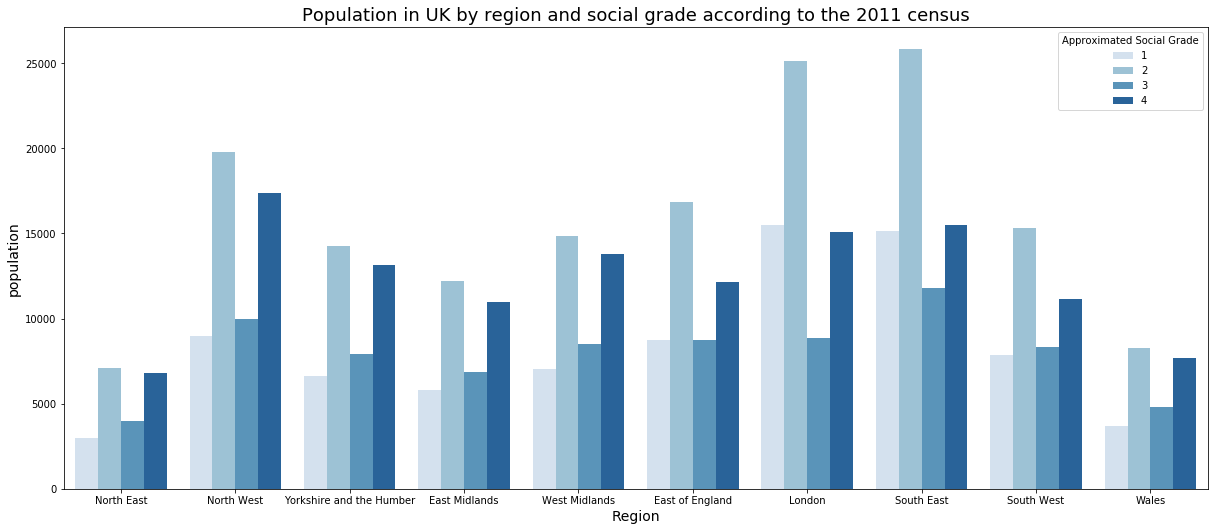

In [26]:
_ = plt.figure(figsize=(20.5, 8.5))
_ = sns.barplot(hue='Approximated Social Grade', 
                y='counter', 
                x='Region', 
                data=df_RegionSocialFilter,
                palette='Blues')
_ = plt.title('Population in UK by region and social grade according to the 2011 census', size=18)
_ = plt.xticks(np.arange(df_region.shape[0]), df_region.region_name)
_ = plt.ylabel('population', size=14)
_ = plt.xlabel('Region', size=14)

In [27]:
df_age = pd.DataFrame({'code':(1, 2, 3, 4, 5, 6, 7, 8), 'age':('0 to 15', 
                                                               '16 to 24', 
                                                               '25 to 34',
                                                               '35 to 44',
                                                               '45 to 54',
                                                               '55 to 64',
                                                               '65 to 74',
                                                               '75 and over')})

In [28]:
df_ageDistributed = df_group.groupby(['Age']).count()
df_ageDistributed.counter

Age
1    106832
2     72785
3     75948
4     78641
5     77388
6     65666
7     48777
8     43704
Name: counter, dtype: int64

In [29]:
df_ageDistributed.reset_index(inplace=True)

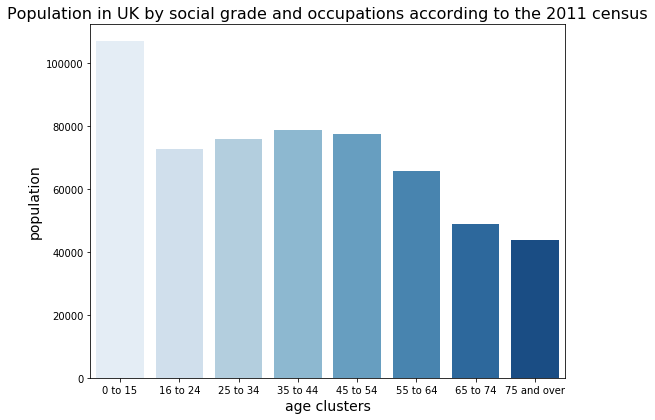

In [30]:
_ = plt.figure(figsize=(8.5, 6.5))
_ = sns.barplot(y='counter', 
                x='Age', 
                data=df_ageDistributed,
                palette='Blues')
_ = plt.title('Population in UK by social grade and occupations according to the 2011 census', size=16)
_ = plt.xticks(np.arange(df_age.shape[0]), df_age.age)
_ = plt.ylabel('population', size=14)
_ = plt.xlabel('age clusters', size=14)

In [31]:
df_group.groupby('Marital Status').count().counter 

Marital Status
1    270999
2    214180
3     11951
4     40713
5     31898
Name: counter, dtype: int64

In [32]:
df_ageSex = df_group.groupby(['Sex', 'Age']).count()

In [33]:
male = df_ageSex.loc[1].counter
female = df_ageSex.loc[2].counter

In [34]:
y_pos = np.arange(len(df_age.age))
empty_ticks = tuple('' for n in df_age.age)

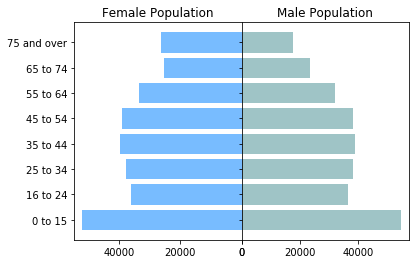

In [35]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y_pos, female.values, align='center', color='dodgerblue', zorder=0, alpha=0.6)
axes[0].set(title='Female Population')
axes[1].barh(y_pos, male.values, align='center', color='cadetblue', zorder=0, alpha=0.6)
axes[1].set(title='Male Population')

axes[0].invert_xaxis()
axes[0].set(yticks=y_pos, yticklabels=df_age.age)

fig.set_figwidth(1.5*fig.get_figheight())
fig.subplots_adjust(wspace=0.001)
plt.show()

In [36]:
# fig, axes = plt.subplots(ncols=2, sharey=True)
# axes[0].barh(y_pos, female.values, align='center', color='dodgerblue', zorder=0, alpha=0.6)
# axes[0].set(title='Female Population')
# axes[1].barh(y_pos, male.values, align='center', color='cadetblue', zorder=0, alpha=0.6)
# axes[1].set(title='Male Population')

# axes[0].invert_xaxis()
# axes[0].set(yticks=y_pos, yticklabels=df_age.age)
# # axes[0].yaxis.tick_right()

# # for ax in axes.flat:
# #     ax.margins(0.03)
# #     ax.grid(True)

# # fig.tight_layout()
# # plt.yticks(y_pos, df_age.age)
# fig.set_figwidth(1.5*fig.get_figheight())

# fig.subplots_adjust(wspace=0.001)
# plt.show()

## Birth Country, Ethnit group and Religion

